# Data Understanding and Domain Expertise

In [1]:
import numpy as np
import dtale
import pandas as pd
from spellchecker import SpellChecker
import peter_romany_module
import re
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r"housing_data_900.csv")
pd.set_option("display.max_rows", None)
pd.set_option("expand_frame_repr", False)
print('THIS IS TASK 1:')

print(df.head())# understanding data(cols and rows)

# property_details= pd.read_csv(r"property_details.csv") # After examining and understanding the data I have explained the data in a CSV file called Property Details
# print(property_details)

THIS IS TASK 1:
   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape Land Contour  ... Pool Area Pool QC Fence Misc Feature Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice
0   1001  527131110          120        RL          45.0      6264   Pave   NaN       IR1          Lvl  ...         0     NaN   NaN          NaN        0       7    2008       WD           Normal     247900
1   1002  527140090          120        RL          41.0      5395   Pave   NaN       IR1          HLS  ...         0     NaN   NaN          NaN        0      10    2008       WD           Normal     180000
2   1003  527145090          120        RL          39.0      5070   Pave   NaN       IR1          HLS  ...         0     NaN   NaN          NaN        0       8    2008       WD           Normal     180000
3   1004  527161010           60        RL         100.0     10839   Pave   NaN       IR1          Lvl  ...         0     NaN   NaN          NaN        0   

# Data Wrangling##  preparing raw data for analysis via convert raw data into analysis-ready data 
via an iterative process that involves: Discovery(exploration), Transformation(Structuring Data - Normalizing Data - Denormalizing Data - Cleaning Data), and Validation.

In [2]:
# Check data types for any type mismatch
df.info()

# Use regular expression to find the type mismatch and check for all types of errors that may exist to identify and obtain columns that are error-free.
# for feature in df.columns:
#     if df[feature].dtype=='int64':
#         peter_romany_module.regex_for_int(df,feature)
# for feature in df.columns:
#     if df[feature].dtype=='float64':
#         peter_romany_module.regex_for_float(df,feature)
# for feature in df.columns:
#     if df[feature].dtype=='object':
#         peter_romany_module.regex_for_str(df,feature)

'''After conducting a thorough check for type mismatch and types of errora within the dataset, these columns contain type mismatch and type of error:
So Order, and PID columns are numerical but does not have measurement unit and no mean to order or perform operations. So must be qualitative data(categorical).(type 1 error)
Sale Type column has space on the far right.(type 2 error)
Garage Yr Blt should be int not float. (type 3 error)'''

# Handle type mismatch and types of errors
mismatch_features = ['Order','PID']
df[mismatch_features] = df[mismatch_features].astype(str)
df['Sale Type'] = df['Sale Type'].str.strip() # This will remove any leading or trailing whitespace from the values in the 'Sale Type' column.

'''We finally reached no type mismatch and the columns are error-free.'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            900 non-null    int64  
 1   PID              900 non-null    int64  
 2   MS SubClass      900 non-null    int64  
 3   MS Zoning        900 non-null    object 
 4   Lot Frontage     734 non-null    float64
 5   Lot Area         900 non-null    int64  
 6   Street           900 non-null    object 
 7   Alley            65 non-null     object 
 8   Lot Shape        900 non-null    object 
 9   Land Contour     900 non-null    object 
 10  Utilities        900 non-null    object 
 11  Lot Config       900 non-null    object 
 12  Land Slope       900 non-null    object 
 13  Neighborhood     900 non-null    object 
 14  Condition 1      900 non-null    object 
 15  Condition 2      900 non-null    object 
 16  Bldg Type        900 non-null    object 
 17  House Style     

'We finally reached no type mismatch and the columns are error-free.'

In [3]:
# Check missing data
'''To deal with missing data we must know how it is represented(?,0,blank,NaN). and then deal with it
there are a lot of approaches to handle missing data:

1-find the actual values if exist and replace missing data.
2-otherwise if not exist trying to guess the appropriate value to replace. 
3-replace missing numerical data by approximate the average value of the entire column(similar datapoints) and replace missing categorical data by the mode. 
4-Forward & Backward filling – (Imputation).
5-drop whole row or entire feature.
6-Leave it as missing data.'''

# print(df.info())
# col00='SalePrice'
# print(df[df[col00].isnull()])#row has null
# print(df[df[col00]=="?"])#row has ?
# print(df[df[col00]==""])#row has blank
# print(df[df[col00]==0])#row has 0

'''After conducting a thorough check for missing data within the dataset, these columns contain missing data:
Lot Frontage, Alley, Pool QC, Fence, and Misc Feature (Columns have real missing data) 
Mas Vnr Type, Mas Vnr Area, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin Type 2, BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF,
Total Bsmt SF, Electrical, Fireplace Qu, Bsmt Full Bath, Bsmt Half Bath, Garage Type, Garage Yr Blt, Garage Finish, Garage Qual, and Garage Cond (Columns have fake missing data) 

Fake missing data: Missing values that imply the non-existence of something in a certain context (e.g., a Null value indicating a house does not have a basement).
Real missing data: Missing values due to the information never being collected or recorded, with no implied meaning or significance (e.g., a missing year built for a house because it was never documented).'''

# Handle missing data
print(df.info())
df = df.drop(["Lot Frontage", "Alley", "Pool QC", "Fence", "Misc Feature"], axis = 1) # These columns contain real missing data, Due to the high proportion of missing data within these columns, in addition to the inability to find actual data to replace missing data, so it is more practical to remove the entire column rather than deleting individual rows.
df[["Mas Vnr Type"]] = df[["Mas Vnr Type"]].fillna("Has No Masonry veneer")
df[["Mas Vnr Area"]] = df[["Mas Vnr Area"]].fillna(0.0)
basementStringColumns =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[basementStringColumns] = df[basementStringColumns].fillna('Has No Basement')
basementNumericColumns = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[basementNumericColumns] = df[basementNumericColumns].fillna(0)
df.drop(df[df['Electrical'].isnull()].index,inplace=True)
df["Fireplace Qu"] = df["Fireplace Qu"].fillna("Has No Fireplace")
garageStringColumns = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[garageStringColumns] = df[garageStringColumns].fillna('Has No Garage')
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)
df['Garage Yr Blt'] = df['Garage Yr Blt'].astype('int64')

'''now data is complete with no missing data.'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            900 non-null    object 
 1   PID              900 non-null    object 
 2   MS SubClass      900 non-null    int64  
 3   MS Zoning        900 non-null    object 
 4   Lot Frontage     734 non-null    float64
 5   Lot Area         900 non-null    int64  
 6   Street           900 non-null    object 
 7   Alley            65 non-null     object 
 8   Lot Shape        900 non-null    object 
 9   Land Contour     900 non-null    object 
 10  Utilities        900 non-null    object 
 11  Lot Config       900 non-null    object 
 12  Land Slope       900 non-null    object 
 13  Neighborhood     900 non-null    object 
 14  Condition 1      900 non-null    object 
 15  Condition 2      900 non-null    object 
 16  Bldg Type        900 non-null    object 
 17  House Style     

'now data is complete with no missing data.'

In [4]:
# Check misspellings
# print(SpellChecker().unknown(df)) # Get all columns that have misspelled
# print(SpellChecker().unknown(df['Neighborhood'])) # Check specific column

'''After conducting a thorough check for misspellings within the dataset, there are no columns contain misspellings.'''

# Check form, schema and other inconsistent
# match_indices=peter_romany_module.regex_patterns(df,'Sale Type','[^"WD""New""CWD""COD""ConLD"]',return_match_indices=True)

'''After conducting a thorough check for form, schema, and other inconsistencies within the dataset, all issues have been addressed
and the data appears to be consistent and accurate.'''

# Check duplicates
# print(df[df.duplicated()])#find duplicate rows across all columns
# print(df[df.duplicated(['SalePrice'])]) #find duplicate rows across specific column
# print(df[df.duplicated(['SalePrice', 'Sale Condition','Sale Type','Bldg Type'])]) #find duplicate rows across specific columns

'''After conducting a thorough check for duplicates within the dataset, all issues have been addressed
and the repetition seems meaningful and precise.'''

'After conducting a thorough check for duplicates within the dataset, all issues have been addressed\nand the repetition seems meaningful and precise.'

# Exploratory Data Analysis (EDA)
##  extracting knowledge (insights) from data begins

In [5]:
# get important insights before dealing with outliers to get the right insights for the actual values
variable_name='SalePrice'
print(f'max for {variable_name}: ' , df[variable_name].max())
print(f'min for {variable_name}: ' , df[variable_name].min())
print(f'count for {variable_name}: ' , df[variable_name].count())
print(f'top 5 distinct values for {variable_name}: ' , df[variable_name].value_counts().head(5))
print(f'mode for {variable_name}: ' , df[variable_name].mode())
print(f'sum for {variable_name}: ' , df[variable_name].sum())
print(f'top nlargest for {variable_name}: ' , df[variable_name].nlargest())
print(f'top nsmallest for {variable_name}: ' , df[variable_name].nsmallest())

max for SalePrice:  755000
min for SalePrice:  13100
count for SalePrice:  899
top 5 distinct values for SalePrice:  SalePrice
145000    11
155000    11
140000    10
185000     9
147000     8
Name: count, dtype: int64
mode for SalePrice:  0    145000
1    155000
Name: SalePrice, dtype: int64
sum for SalePrice:  172815786
top nlargest for SalePrice:  767    755000
760    745000
63     615000
637    591587
701    500067
Name: SalePrice, dtype: int64
top nsmallest for SalePrice:  553    13100
555    40000
302    46500
220    52000
321    55000
Name: SalePrice, dtype: int64


In [6]:
# Handle outliers
''' there are 4 ways to deal with outliers: 1- Winsorizing approach which involves replacing outliers with the next highest score that is not an outlier.
2- Replacing outliers with the value next to it in addition to add 1.       3- Taking for whole data log or power.          4- Remove outliers '''

# for feature in df.columns:
#     if df[feature].dtype=='int64':
#         peter_romany_module.dealing_with_outlier(df,feature,show_outliers=True)

peter_romany_module.dealing_with_outlier(df,'Mas Vnr Area',show_outliers=False) # the function dealing with outliers performs Winsorizing approach.
peter_romany_module.dealing_with_outlier(df,'BsmtFin SF 1',show_outliers=False)
peter_romany_module.dealing_with_outlier(df,'BsmtFin SF 2',show_outliers=False)
peter_romany_module.dealing_with_outlier(df,'Bsmt Unf SF',show_outliers=False)
peter_romany_module.dealing_with_outlier(df,'Total Bsmt SF',show_outliers=False)
peter_romany_module.dealing_with_outlier(df,'Bsmt Half Bath',show_outliers=False)
peter_romany_module.dealing_with_outlier(df,'MS SubClass',show_outliers=False)
peter_romany_module.dealing_with_outlier(df,'Lot Area',show_outliers=False)
peter_romany_module.dealing_with_outlier(df,'Overall Qual',show_outliers=False)
peter_romany_module.dealing_with_outlier(df,'Overall Cond',show_outliers=False)
peter_romany_module.dealing_with_outlier(df,'1st Flr SF',show_outliers=False)
peter_romany_module.dealing_with_outlier(df,'2nd Flr SF',show_outliers=False)
peter_romany_module.dealing_with_outlier(df,'Gr Liv Area',show_outliers=False)
peter_romany_module.dealing_with_outlier(df,'Bedroom AbvGr',show_outliers=False)
peter_romany_module.dealing_with_outlier(df,'Kitchen AbvGr',show_outliers=False)
peter_romany_module.dealing_with_outlier(df,'TotRms AbvGrd',show_outliers=False)
peter_romany_module.dealing_with_outlier(df,'Fireplaces',show_outliers=False)
peter_romany_module.dealing_with_outlier(df,'Garage Cars',show_outliers=False)
peter_romany_module.dealing_with_outlier(df,'Garage Area',show_outliers=False)
peter_romany_module.dealing_with_outlier(df,'Wood Deck SF',show_outliers=False)
peter_romany_module.dealing_with_outlier(df,'Open Porch SF',show_outliers=False)
peter_romany_module.dealing_with_outlier(df,'Enclosed Porch',show_outliers=False)
peter_romany_module.dealing_with_outlier(df,'3Ssn Porch',show_outliers=False)
peter_romany_module.dealing_with_outlier(df,'Screen Porch',show_outliers=False)
peter_romany_module.dealing_with_outlier(df,'Pool Area',show_outliers=False)
peter_romany_module.dealing_with_outlier(df,'Misc Val',show_outliers=False)
peter_romany_module.dealing_with_outlier(df,'SalePrice',show_outliers=False)

'''The method dealing_with_outlier() alternates between activation and deactivation to ensure the acquisition of accurate and comprehensive information from actual data.
It identifies outliers, storing them for further study and insight extraction purposes.'''

C:\Users\beter\Peter_Romany_XOrithm_THA\peter_romany_module.py:38: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '157.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\beter\Peter_Romany_XOrithm_THA\peter_romany_module.py:38: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '7.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\beter\Peter_Romany_XOrithm_THA\peter_romany_module.py:38: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2235.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\beter\Peter_Romany_XOrithm_THA\peter_romany_module.py:38: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a fu

'The method dealing_with_outlier() alternates between activation and deactivation to ensure the acquisition of accurate and comprehensive information from actual data.\nIt identifies outliers, storing them for further study and insight extraction purposes.'

perform insights_by_descriptive_analytics
=============================== SalePrice ===========================================
minus= 115180.97134683908 mean= 188566.96329254727 plus= 261952.95523825544 
 CV= 38.917735463478515 % CV_Rate= 71.52391546162403 %
skewness= 0.8212610911571516 rate 61.29032258064516 % [ 551 out of 899 ] [ most in low [where mode locate (mode < median= 174000.0 < mean= 188566.96329254727)] ]

perform insights_by_descriptive_analytics
=============================== Lot Area ===========================================
minus= 5966.311521605592 mean= 9539.666295884315 plus= 13113.021070163039 
 CV= 37.457859252585926 % CV_Rate= 71.63515016685206 %
skewness= 0.14129743042211496 rate 50.16685205784205 % [ 451 out of 899 ] [ most in low [where mode locate (mode < median= 9520.0 < mean= 9539.666295884315)] ]



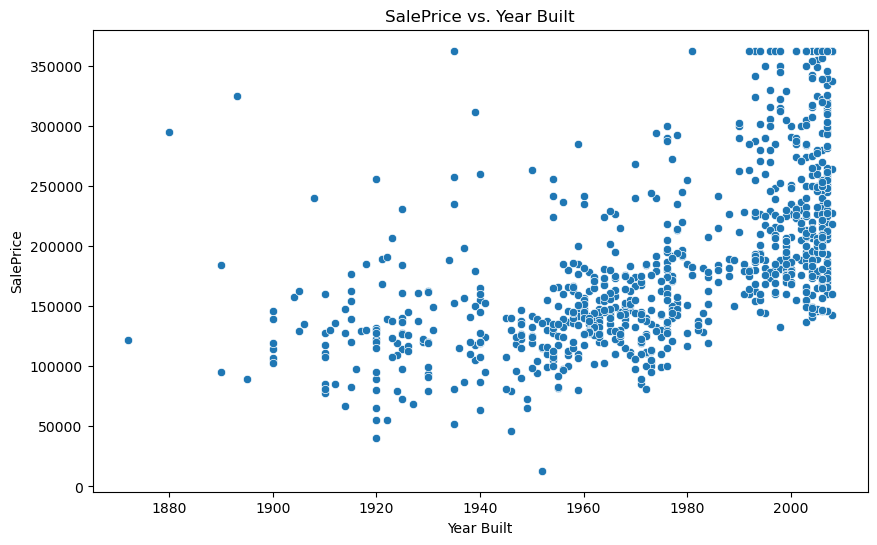

E:\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



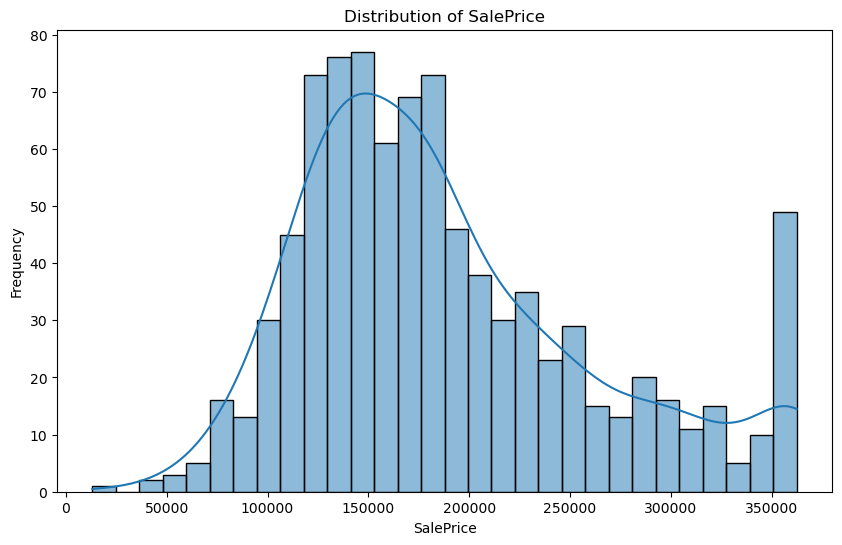

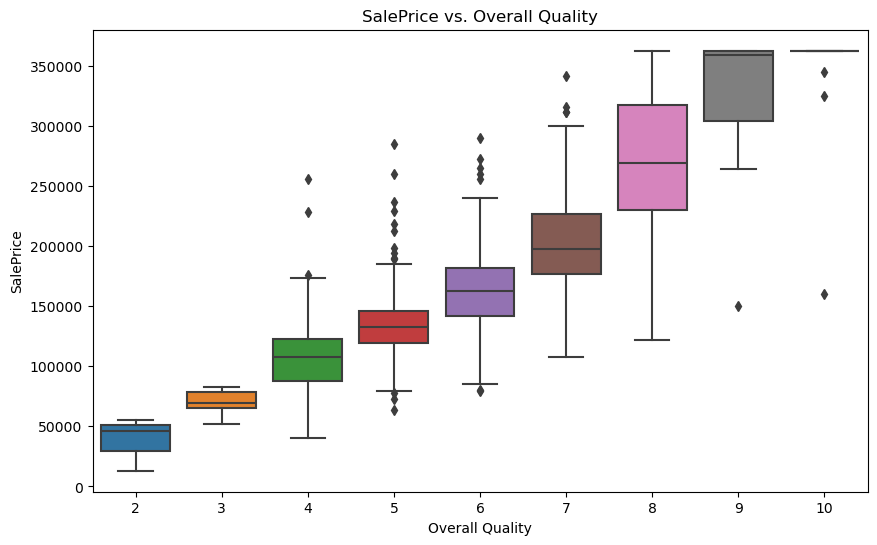

'Explanation: A box plot of Overall Qual (Overall Quality) versus SalePrice shows that higher quality ratings are associated with higher sale prices.'

In [7]:
# Export DataFrame to CSV for data visualization phase in power BI
# df.to_csv('analysis_ready_data.csv', index=False)

'''                                                      Insights
this phase involves the use of pattern recognition technologies, statistical analysis and mathematical techniques. 
we will identify correlations in data, find patterns and variations. Understand trends and anomalies. predict probabilities and do hypothesis Tests.
'''

peter_romany_module.insights_by_descriptive_analytics(df,'SalePrice') # this function express the data through a value Whoever reads this value can understand the data as a whole.
peter_romany_module.insights_by_descriptive_analytics(df,'Lot Area')

# SalePrice vs. Year Built
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year Built', y='SalePrice', data=df)
plt.title('SalePrice vs. Year Built')
plt.xlabel('Year Built')
plt.ylabel('SalePrice')
plt.show()
'''Explanation: We see from the chart that the price was decreasing over time until it reached the year 1940, and then it began to increase gradually until today'''

# Distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()
'''Explanation: The distribution is right-skewed, indicating that most properties are in the lower price range, with a few very high-priced properties.'''

# Categorical feature analysis: SalePrice vs. Overall Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='Overall Qual', y='SalePrice', data=df)
plt.title('SalePrice vs. Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('SalePrice')
plt.show()
'''Explanation: A box plot of Overall Qual (Overall Quality) versus SalePrice shows that higher quality ratings are associated with higher sale prices.'''


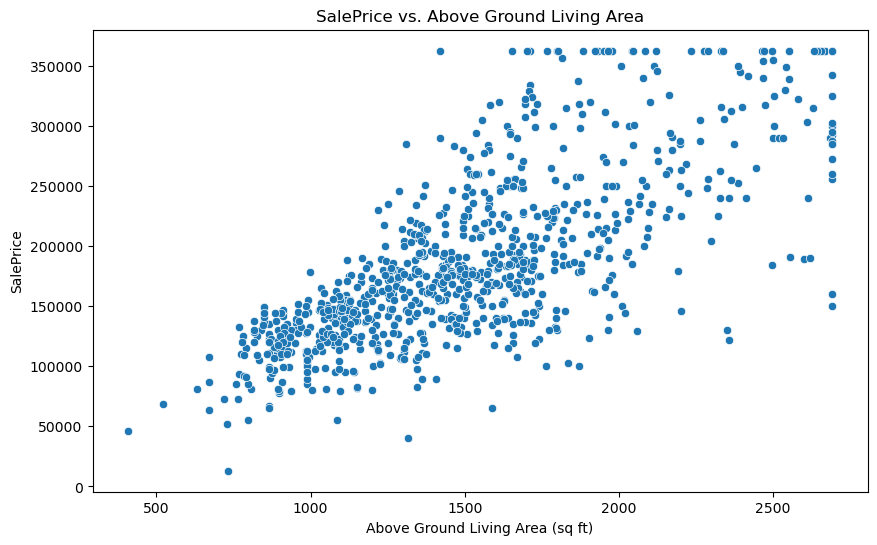

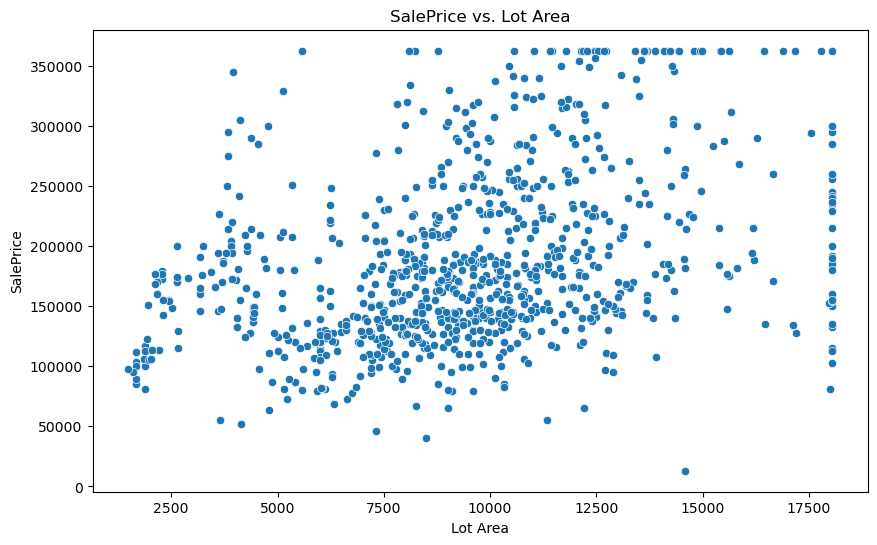

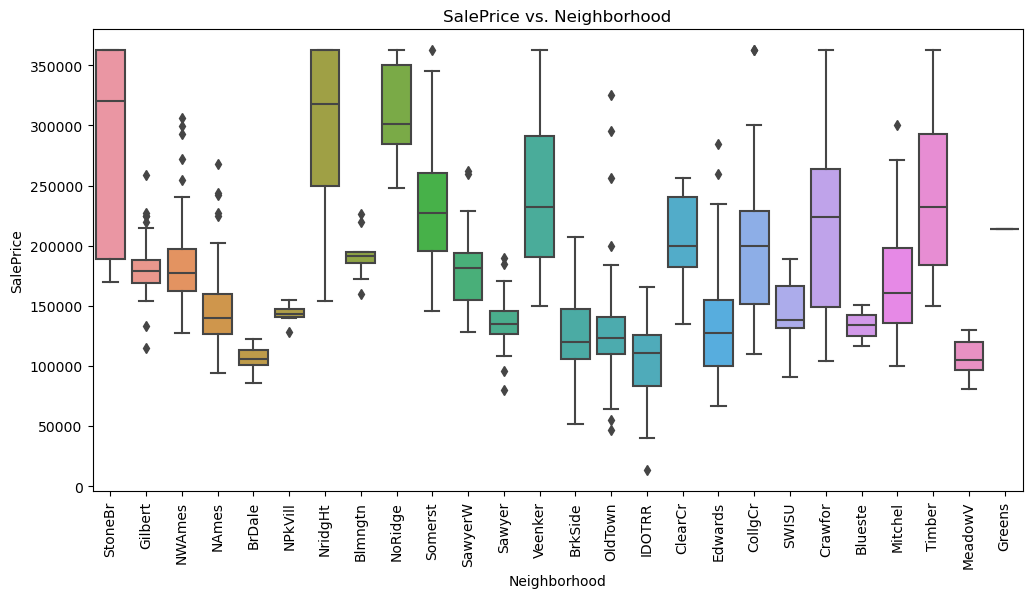

'Explanation: The box plot shows the distribution of sale prices across different neighborhoods, highlighting which neighborhoods have higher median sale prices.'

In [8]:
# Exploring relationship with numerical features: SalePrice vs. Above Ground Living Area
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)
plt.title('SalePrice vs. Above Ground Living Area')
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('SalePrice')
plt.show()
'''Explanation: This scatter plot shows that larger living areas generally correspond to higher sale prices.'''

# SalePrice vs. Lot Area
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Lot Area', y='SalePrice', data=df)
plt.title('SalePrice vs. Lot Area')
plt.xlabel('Lot Area')
plt.ylabel('SalePrice')
plt.show()
'''Explanation: This scatter plot indicates the relationship between lot size and sale price, showing that larger lots can command higher prices.'''

# SalePrice vs. Neighborhood
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.xticks(rotation=90)
plt.title('SalePrice vs. Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.show()
'''Explanation: The box plot shows the distribution of sale prices across different neighborhoods, highlighting which neighborhoods have higher median sale prices.'''

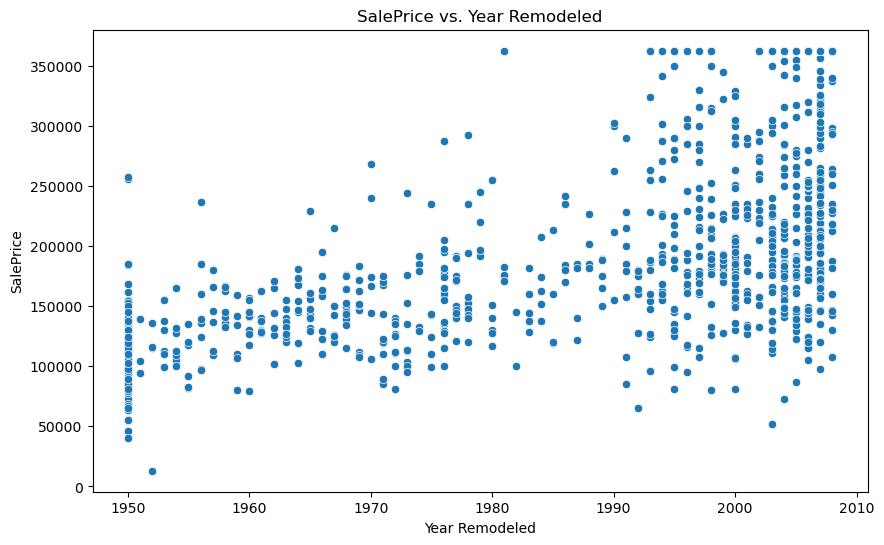

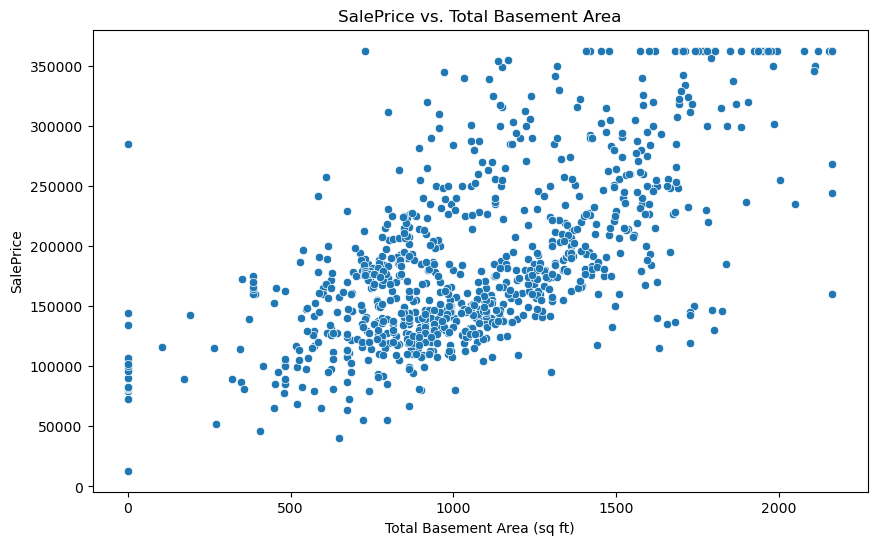

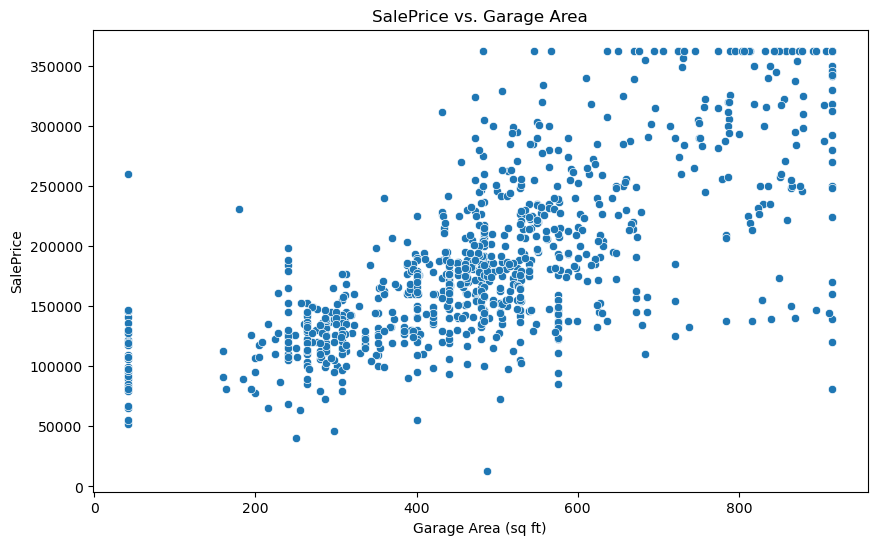

'Explanation: This scatter plot shows that properties with larger garage areas tend to have higher sale prices.'

In [9]:
# SalePrice vs. Year Remodeled
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year Remod/Add', y='SalePrice', data=df)
plt.title('SalePrice vs. Year Remodeled')
plt.xlabel('Year Remodeled')
plt.ylabel('SalePrice')
plt.show()
'''Explanation: This scatter plot shows how the year of remodeling or addition impacts sale prices, indicating that more recently remodeled properties tend to sell for higher prices.'''

# SalePrice vs. Total Basement Area
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Bsmt SF', y='SalePrice', data=df)
plt.title('SalePrice vs. Total Basement Area')
plt.xlabel('Total Basement Area (sq ft)')
plt.ylabel('SalePrice')
plt.show()
'''Explanation: This plot shows the relationship between basement area and sale price, indicating that larger basements can increase property value.'''

# SalePrice vs. Garage Area
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Garage Area', y='SalePrice', data=df)
plt.title('SalePrice vs. Garage Area')
plt.xlabel('Garage Area (sq ft)')
plt.ylabel('SalePrice')
plt.show()
'''Explanation: This scatter plot shows that properties with larger garage areas tend to have higher sale prices.'''

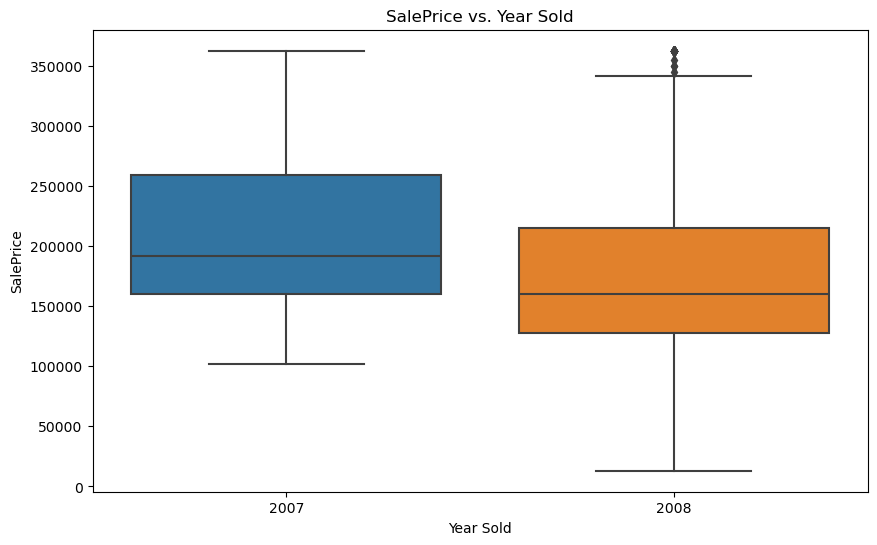

E:\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

E:\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



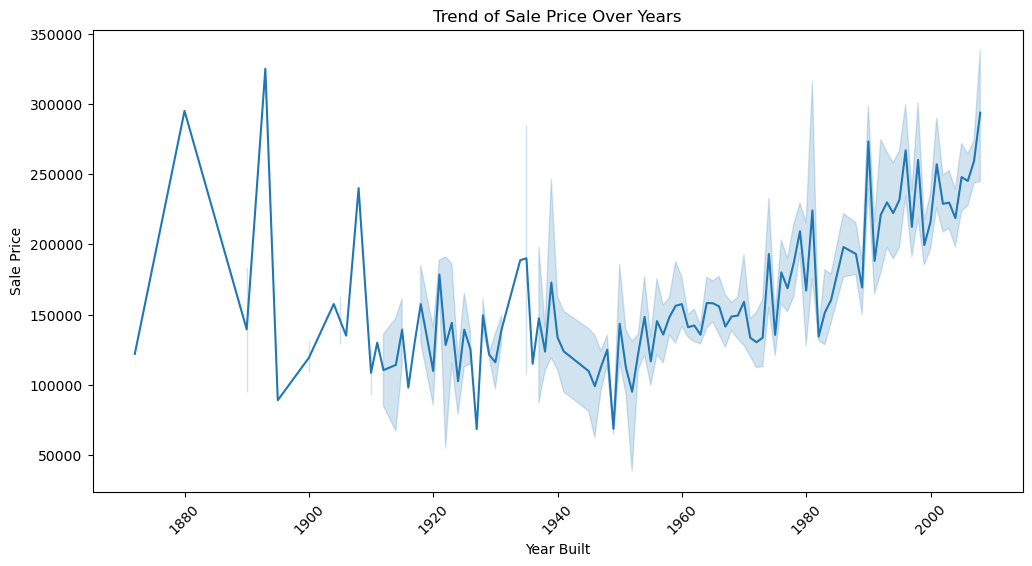

E:\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

E:\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



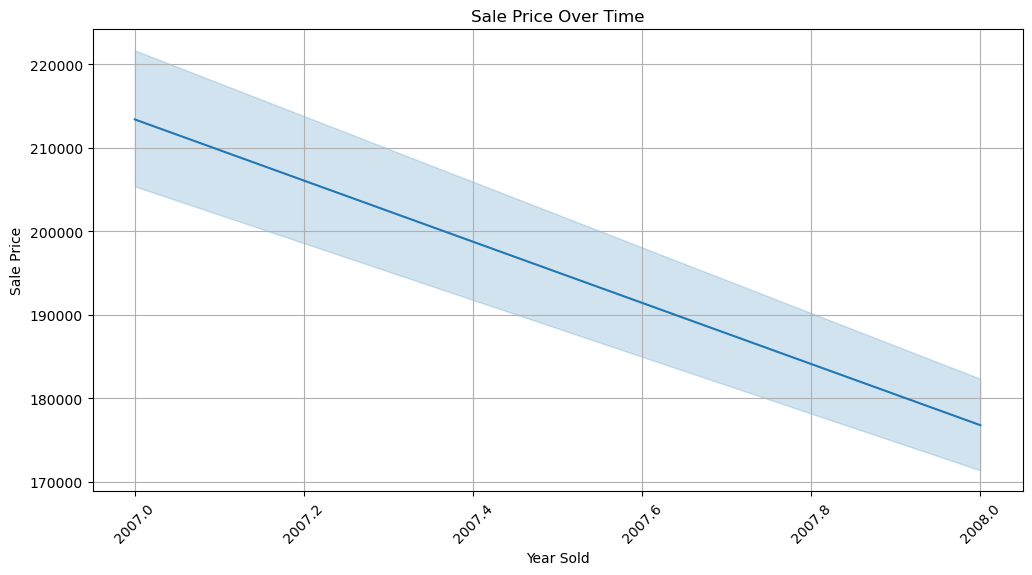

In [10]:
# SalePrice vs. Year Sold
plt.figure(figsize=(10, 6))
sns.boxplot(x='Yr Sold', y='SalePrice', data=df)
plt.title('SalePrice vs. Year Sold')
plt.xlabel('Year Sold')
plt.ylabel('SalePrice')
plt.show()
'''Explanation: This box plot shows the variation of sale prices across different years, providing insights into market trends over time.'''

# Identify trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year Built', y='SalePrice', data=df)
plt.title('Trend of Sale Price Over Years')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)
plt.show()

# Plotting the distribution of 'SalePrice' over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Yr Sold', y='SalePrice', data=df)
plt.title('Sale Price Over Time')
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

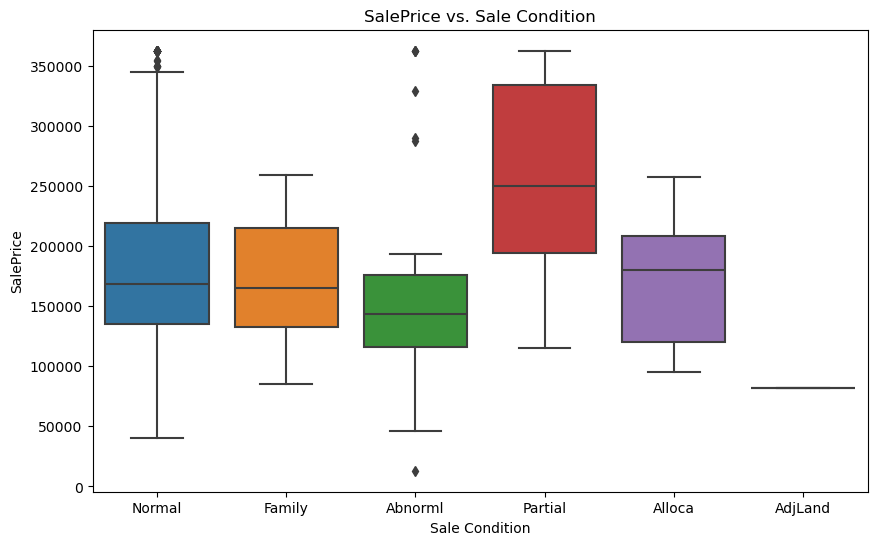

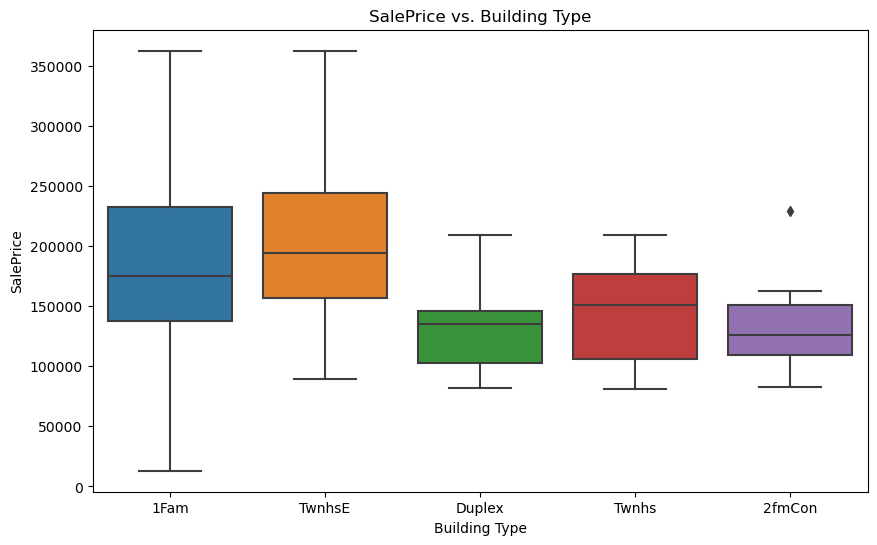

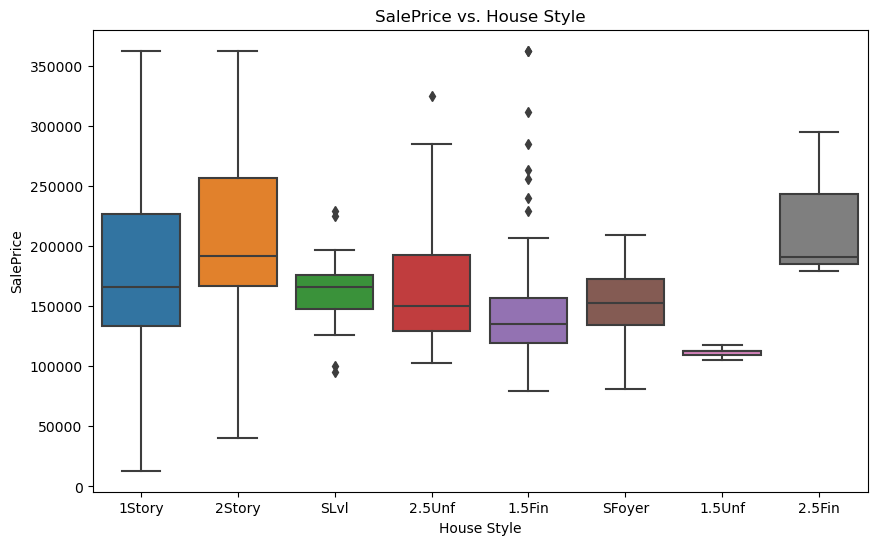

'Explanation: The house style affects sale prices, with certain styles potentially commanding higher prices.'

In [11]:
# SalePrice vs. Sale Condition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sale Condition', y='SalePrice', data=df)
plt.title('SalePrice vs. Sale Condition')
plt.xlabel('Sale Condition')
plt.ylabel('SalePrice')
plt.show()
'''Explanation: This plot shows how different sale conditions (e.g., Normal Sale, Abnormal Sale) impact sale prices.'''

# SalePrice vs. Building Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bldg Type', y='SalePrice', data=df)
plt.title('SalePrice vs. Building Type')
plt.xlabel('Building Type')
plt.ylabel('SalePrice')
plt.show()
'''Explanation: Different building types (e.g., Single-family, Duplex) have varying impacts on sale prices.'''

# SalePrice vs. House Style
plt.figure(figsize=(10, 6))
sns.boxplot(x='House Style', y='SalePrice', data=df)
plt.title('SalePrice vs. House Style')
plt.xlabel('House Style')
plt.ylabel('SalePrice')
plt.show()
'''Explanation: The house style affects sale prices, with certain styles potentially commanding higher prices.'''

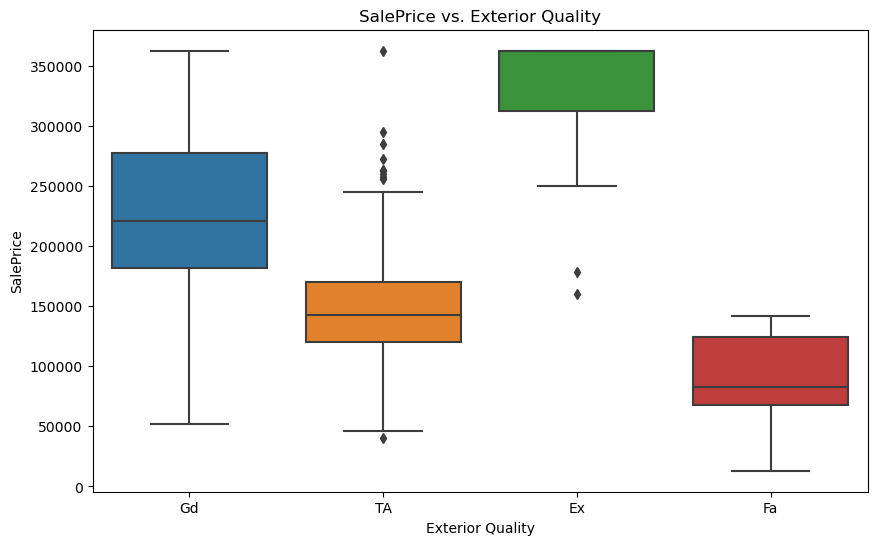

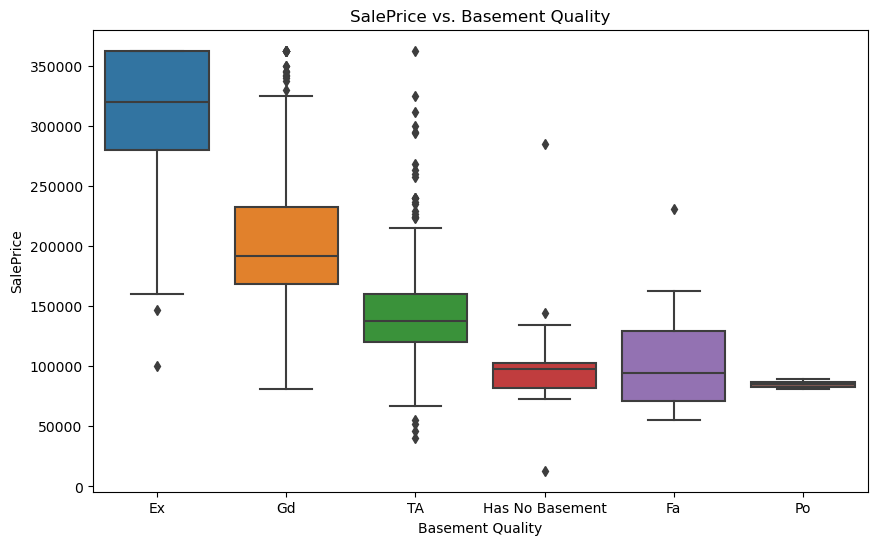

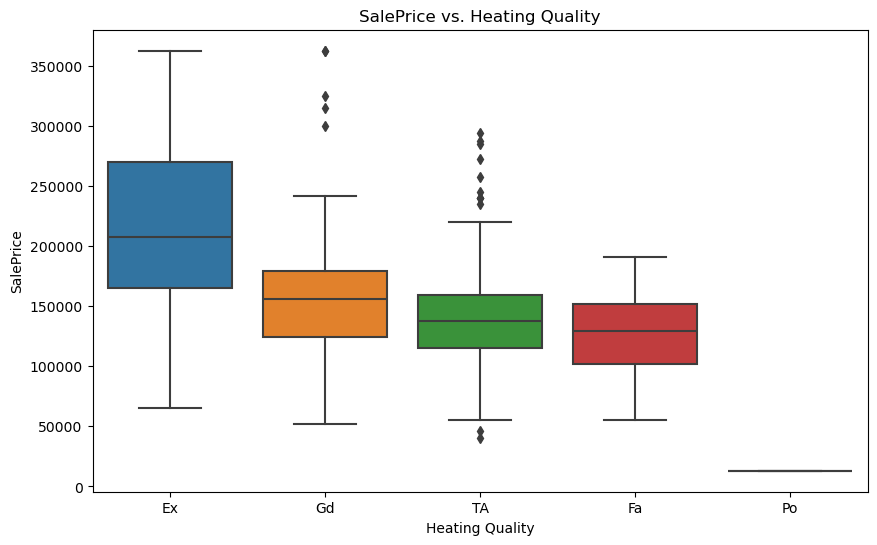

'Explanation: The quality of heating systems in a house (e.g., Excellent, Good, Average) can affect the sale price.'

In [12]:
# SalePrice vs. Exterior Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exter Qual', y='SalePrice', data=df)
plt.title('SalePrice vs. Exterior Quality')
plt.xlabel('Exterior Quality')
plt.ylabel('SalePrice')
plt.show()
'''Explanation: The quality of the exterior finish (e.g., Excellent, Good, Fair) can significantly influence sale prices.'''

# SalePrice vs. Basement Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bsmt Qual', y='SalePrice', data=df)
plt.title('SalePrice vs. Basement Quality')
plt.xlabel('Basement Quality')
plt.ylabel('SalePrice')
plt.show()
'''Explanation: The quality of the basement can impact the sale price, with higher quality basements leading to higher prices.'''

# SalePrice vs. Heating Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='Heating QC', y='SalePrice', data=df)
plt.title('SalePrice vs. Heating Quality')
plt.xlabel('Heating Quality')
plt.ylabel('SalePrice')
plt.show()
'''Explanation: The quality of heating systems in a house (e.g., Excellent, Good, Average) can affect the sale price.'''

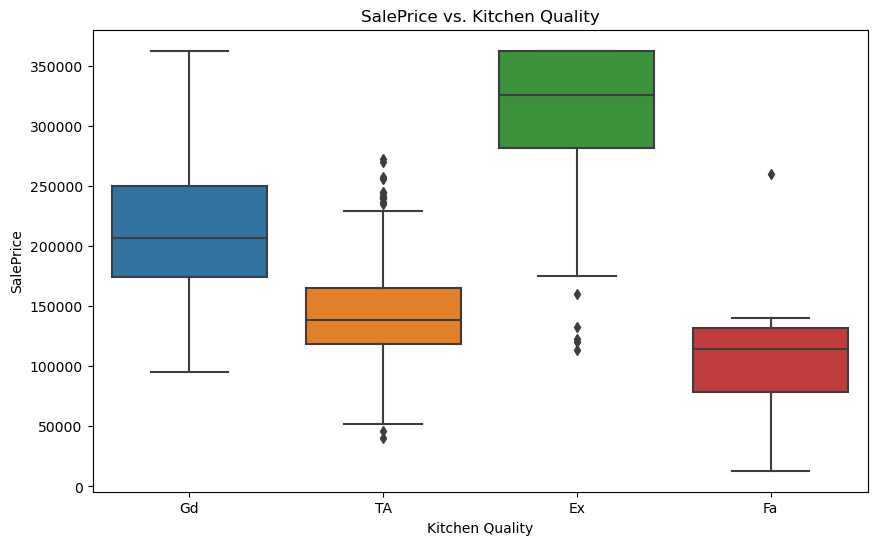

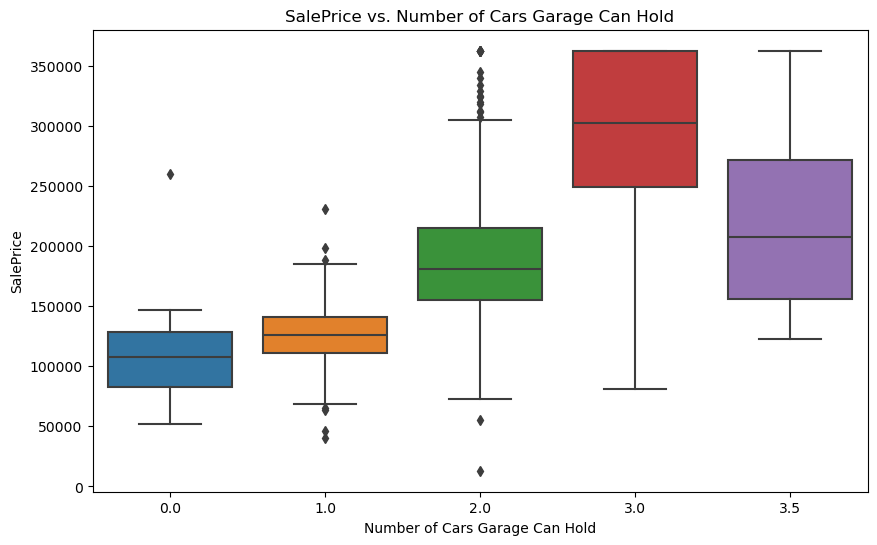

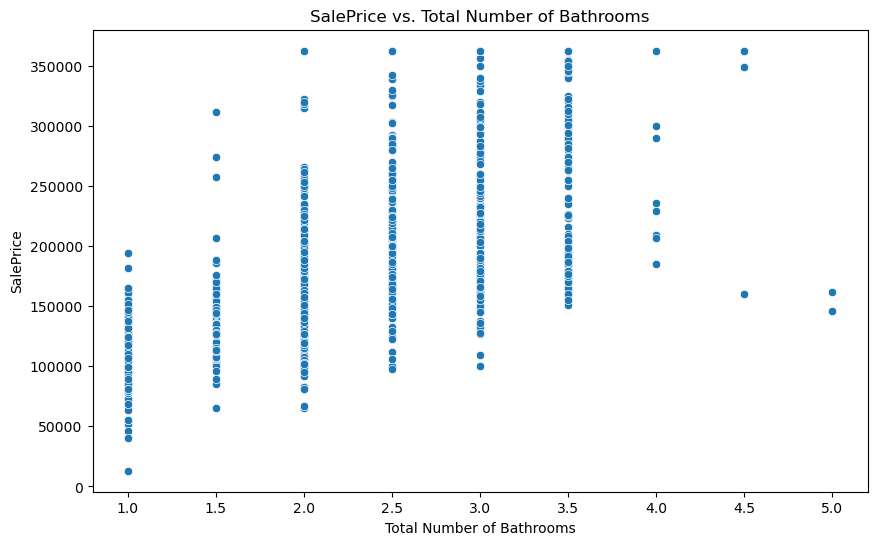

'Explanation: This plot shows how the total number of bathrooms (including full and half baths) impacts the sale price, with more bathrooms generally leading to higher prices.'

In [13]:
# SalePrice vs. Kitchen Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='Kitchen Qual', y='SalePrice', data=df)
plt.title('SalePrice vs. Kitchen Quality')
plt.xlabel('Kitchen Quality')
plt.ylabel('SalePrice')
plt.show()
'''Explanation: The quality of the kitchen is an important factor influencing the sale price, with higher quality kitchens leading to higher prices.'''

# SalePrice vs. Garage Cars
plt.figure(figsize=(10, 6))
sns.boxplot(x='Garage Cars', y='SalePrice', data=df)
plt.title('SalePrice vs. Number of Cars Garage Can Hold')
plt.xlabel('Number of Cars Garage Can Hold')
plt.ylabel('SalePrice')
plt.show()
'''Explanation:The number of cars a garage can hold impacts the sale price, with larger garages generally commanding higher prices.'''

# SalePrice vs. Number of Bathrooms
df['Total Bathrooms'] = df['Full Bath'] + 0.5 * df['Half Bath'] + df['Bsmt Full Bath'] + 0.5 * df['Bsmt Half Bath']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Bathrooms', y='SalePrice', data=df)
plt.title('SalePrice vs. Total Number of Bathrooms')
plt.xlabel('Total Number of Bathrooms')
plt.ylabel('SalePrice')
plt.show()
'''Explanation: This plot shows how the total number of bathrooms (including full and half baths) impacts the sale price, with more bathrooms generally leading to higher prices.'''

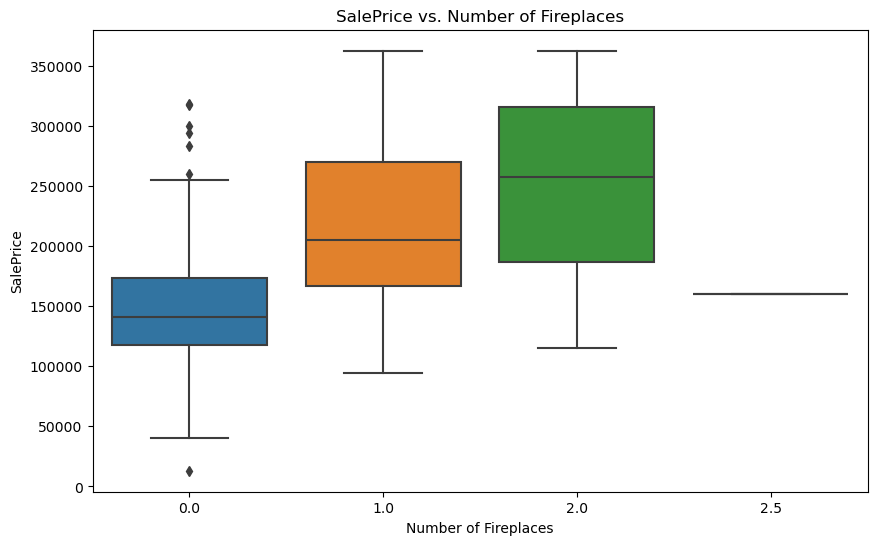

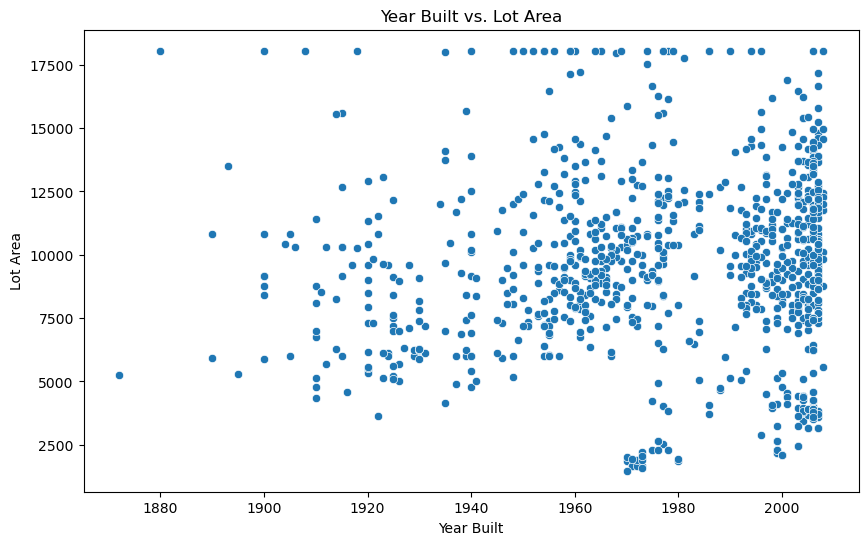

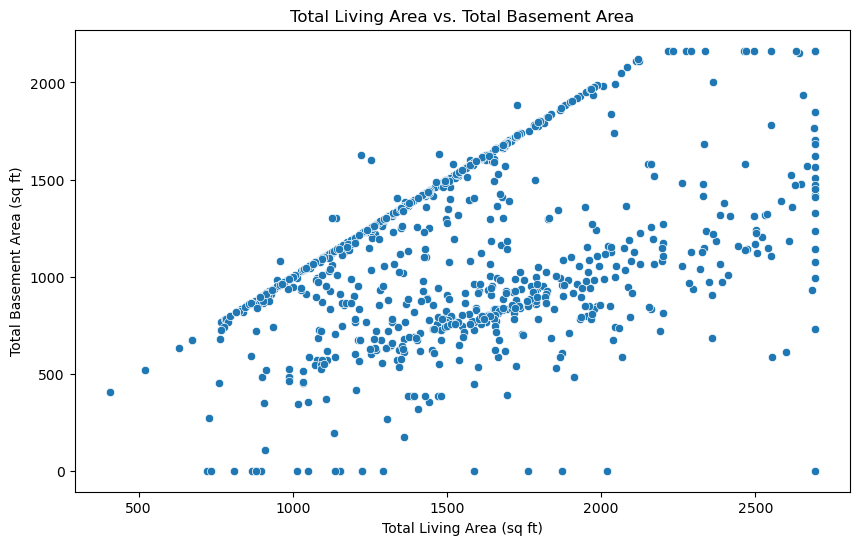

'Explanation: This plot shows the relationship between the total above-ground living area and the total basement area, indicating how these two aspects are related in property design.'

In [14]:
# SalePrice vs. Number of Fireplaces
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fireplaces', y='SalePrice', data=df)
plt.title('SalePrice vs. Number of Fireplaces')
plt.xlabel('Number of Fireplaces')
plt.ylabel('SalePrice')
plt.show()
'''Explanation: The number of fireplaces in a property can impact its sale price, with more fireplaces often increasing the property value.'''

# Year Built vs. Lot Area
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year Built', y='Lot Area', data=df)
plt.title('Year Built vs. Lot Area')
plt.xlabel('Year Built')
plt.ylabel('Lot Area')
plt.show()
'''Explanation: This scatter plot shows the relationship between the year a property was built and its lot area, providing insights into how lot sizes have changed over time.'''

# Total Living Area vs. Total Basement Area
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gr Liv Area', y='Total Bsmt SF', data=df)
plt.title('Total Living Area vs. Total Basement Area')
plt.xlabel('Total Living Area (sq ft)')
plt.ylabel('Total Basement Area (sq ft)')
plt.show()
'''Explanation: This plot shows the relationship between the total above-ground living area and the total basement area, indicating how these two aspects are related in property design.'''

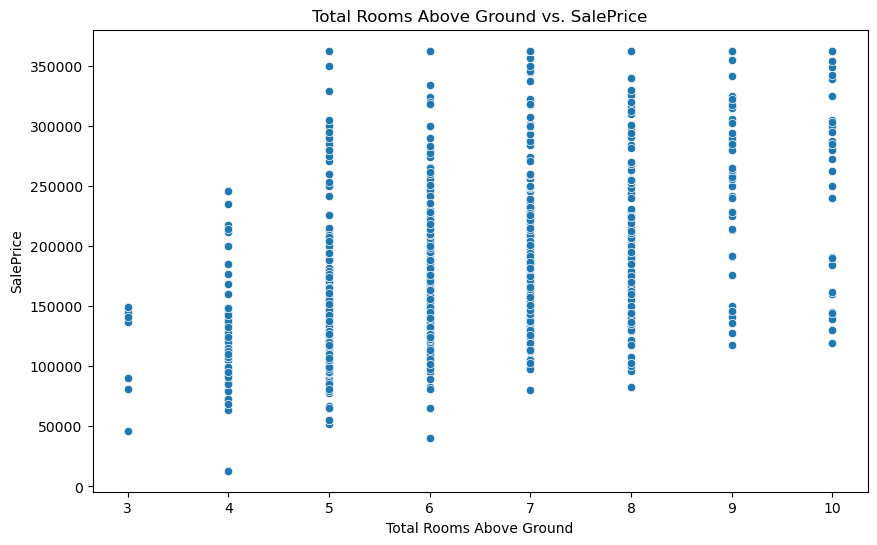


Total number of unique neighborhoods: 26

Distribution of house styles:
House Style
1Story    51.056730
2Story    31.368187
1.5Fin     9.010011
SLvl       4.783092
SFoyer     2.002225
2.5Unf     0.889878
1.5Unf     0.556174
2.5Fin     0.333704
Name: proportion, dtype: float64

Percentage of houses with different exterior materials:
Exterior 1st
VinylSd    36.929922
MetalSd    16.685206
HdBoard    16.462736
Wd Sdng    10.011123
Plywood     7.007786
CemntBd     4.671858
BrkFace     2.780868
WdShing     2.224694
Stucco      1.557286
AsbShng     1.334816
AsphShn     0.111235
PreCast     0.111235
Stone       0.111235
Name: proportion, dtype: float64

Total area of basement by basement exposure:
Bsmt Exposure
Av                 167152.5
Gd                 148706.5
Has No Basement       725.0
Mn                  81022.0
No                 572685.5
Name: Total Bsmt SF, dtype: float64


In [15]:
# Total Rooms vs. SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotRms AbvGrd', y='SalePrice', data=df)
plt.title('Total Rooms Above Ground vs. SalePrice')
plt.xlabel('Total Rooms Above Ground')
plt.ylabel('SalePrice')
plt.show()
'''Explanation: This plot shows how the number of rooms above ground affects the sale price, with more rooms generally leading to higher prices.'''

# Total number of unique neighborhoods
total_unique_neighborhoods = df['Neighborhood'].nunique()
print("\nTotal number of unique neighborhoods:", total_unique_neighborhoods)
# Explanation: Understanding the total number of unique neighborhoods can provide insights into the diversity of the area covered by the dataset. More unique neighborhoods might indicate a broader range of properties and potentially different market dynamics.

# Distribution of house styles
house_style_distribution = df['House Style'].value_counts(normalize=True) * 100
print("\nDistribution of house styles:")
print(house_style_distribution)
# Explanation: Analyzing the distribution of house styles can help identify prevalent architectural preferences within the dataset. This insight can be valuable for developers and real estate agents to tailor their offerings to meet market demand.

# Percentage of houses with different exterior materials
exterior_material_percentage = df['Exterior 1st'].value_counts(normalize=True) * 100
print("\nPercentage of houses with different exterior materials:")
print(exterior_material_percentage)
# Explanation: Knowing the percentage of houses with different exterior materials provides insight into the popularity of certain building materials. This information can guide decisions on property renovations, new constructions, or material sourcing.

# Total area of basement by basement exposure
total_basement_area_exposure = df.groupby('Bsmt Exposure')['Total Bsmt SF'].sum()
print("\nTotal area of basement by basement exposure:")
print(total_basement_area_exposure)
# Explanation: Understanding the total area of basements categorized by exposure type offers insights into the distribution of usable basement space. This knowledge can influence pricing strategies and marketing efforts for properties with basements.

In [16]:
# Distribution of heating types
heating_distribution = df['Heating'].value_counts(normalize=True) * 100
print("\nDistribution of heating types:")
print(heating_distribution)
# Explanation: This insight is crucial for property developers, homeowners, and energy policymakers to understand energy consumption patterns and environmental impact.

# Average number of bedrooms above ground by overall quality
avg_bedrooms_by_quality = df.groupby('Overall Qual')['Bedroom AbvGr'].mean()
print("\nAverage number of bedrooms above ground by overall quality:")
print(avg_bedrooms_by_quality)
# Explanation: Examining the average number of bedrooms above ground by overall quality provides insight into the relationship between property quality and bedroom count. This information can inform property valuations and investment decisions.

# Distribution of garage finishes
garage_finish_distribution = df['Garage Finish'].value_counts(normalize=True) * 100
print("\nDistribution of garage finishes:")
print(garage_finish_distribution)
# Explanation: Understanding the distribution of garage finishes helps identify common preferences among homeowners. This insight is valuable for property developers and renovators to prioritize garage upgrades that resonate with potential buyers.

# Average Sale Price per Building Type and House Style:
average_price_per_building_and_style = df.groupby(['Bldg Type', 'House Style'])['SalePrice'].mean().head(5)
print("\nAverage Sale Price per Building Type and House Style:")
print(average_price_per_building_and_style)
# this insight reveals how different combinations of these factors impact sale prices.

# Average Sale Price per Lot Shape:
average_price_per_lot_shape = df.groupby('Lot Shape')['SalePrice'].mean()
print("\nAverage Sale Price per Lot Shape:")
print(average_price_per_lot_shape)
# helps identify whether certain lot shapes are associated with higher or lower property values.

# Total pool area
total_pool_area = df['Pool Area'].sum()
print("\nTotal pool area:", total_pool_area)
# Explanation: Knowing the total pool area provides insight into the prevalence of pools within the dataset. This information can be useful for marketing luxury properties or assessing the demand for pool-related amenities.

# Percentage of houses with different sale conditions
sale_condition_percentage = df['Sale Condition'].value_counts(normalize=True) * 100
print("\nPercentage of houses with different sale conditions:")
print(sale_condition_percentage)
# Explanation: Analyzing the percentage of houses with different sale conditions offers insights into market dynamics and buyer preferences. Understanding common sale conditions can guide pricing strategies and negotiations.

# Average sale price variation by garage type
sale_price_variation_garage_type = df.groupby('Garage Type')['SalePrice'].max() - df.groupby('Garage Type')['SalePrice'].min()
print("\nAverage sale price variation by garage type:")
print(sale_price_variation_garage_type)
# Explanation: Calculating the average sale price variation by garage type reveals the price range variability associated with different garage types. This insight helps assess the impact of garage features on property valuations and buyer perceptions.

# d = dtale.show(df, host='localhost', subprocess=False)
# d.open_browser()


Distribution of heating types:
Heating
GasA     98.887653
GasW      0.556174
OthW      0.222469
Floor     0.111235
Grav      0.111235
Wall      0.111235
Name: proportion, dtype: float64

Average number of bedrooms above ground by overall quality:
Overall Qual
2     1.666667
3     2.583333
4     2.329787
5     2.924658
6     2.891489
7     2.894872
8     2.864286
9     2.700000
10    2.571429
Name: Bedroom AbvGr, dtype: float64

Distribution of garage finishes:
Garage Finish
Unf              36.262514
RFn              30.367075
Fin              28.476085
Has No Garage     4.894327
Name: proportion, dtype: float64

Average Sale Price per Building Type and House Style:
Bldg Type  House Style
1Fam       1.5Fin         147878.662162
           1.5Unf         110125.000000
           1Story         182841.150418
           2.5Fin         221833.333333
           2.5Unf         184916.666667
Name: SalePrice, dtype: float64

Average Sale Price per Lot Shape:
Lot Shape
IR1    210881.776435
IR2

In [17]:
'''
                                         Hypothesis tests and correlation
                there are assumptions for each test let's check them first before beginning
'''

# Check for Entropy and data diversity
print(df['Central Air'].value_counts())

'''
After conducting a thorough check for entropy and data diversity within the dataset, the Dataset imbalance, potentially leading to biased predictions and impacting model fairness.
let's solve this problem by Under-Sampling Techniques
'''

# Separating the data for analysis
houses_with_ac = df[df['Central Air'] == 'Y']
houses_without_ac = df[df['Central Air'] == 'N']

# Balancing Imbalanced Datasets: Under-Sampling Techniques
sample_size = len(houses_without_ac)
houses_with_ac_sample = houses_with_ac.sample(n=sample_size)
# Amount of sale prices for houses with central air (sampled)
sale_prices_with_ac_sample = houses_with_ac_sample['SalePrice']
sale_prices_with_ac_sample.name = 'sale_prices_with_ac_sample'
# Amount of sale prices for houses without central air
sale_prices_without_ac = houses_without_ac['SalePrice']
sale_prices_without_ac.name = 'sale_prices_without_ac'
# Creating the new balanced dataset
balanced_dataset = pd.concat([houses_with_ac_sample, houses_without_ac], axis=0)
# Dropping the 'Central Air' column to get independent variables
independent_variables = balanced_dataset.drop(columns='Central Air', axis=1)

'''now we ready for the test'''

Central Air
Y    854
N     45
Name: count, dtype: int64


'now we ready for the test'

In [18]:
var1,var2=sale_prices_with_ac_sample,sale_prices_without_ac
peter_romany_module.check_normality(var1,var2) # This ensures that the data follows a normal distribution, which is an assumption of the t-test
peter_romany_module.check_variance_homogeneity(var1,var2) # This verifies if the variances of the two groups are equal, another assumption of the t-test
peter_romany_module.independent_sample_ttest(var1,var2,equal_variance=True)# The equal_variance parameter =True because the results of the homogeneity test
'''T-test results show there is a statistically significant difference in sale prices between houses with and without central air conditioning.'''

# This helps understand the distribution of different lot shapes in the dataset
print(df['Lot Shape'].value_counts()) # the Dataset balance

# A robust version of ANOVA will be used, which can handle violations of ANOVA assumptions
peter_romany_module.one_way_anova(df,df['Lot Shape'],df['SalePrice'],robust_anova=True)
'''One-way ANOVA results indicate that there are significant differences in sale prices among the different lot shapes.'''

'''the next phase: correlation and measures of position'''
variable1=df['Overall Qual']
variable2=df['SalePrice']
peter_romany_module.check_normality(variable1,variable2)
peter_romany_module.check_variance_homogeneity(variable1,variable2)
peter_romany_module.pearsonr(variable1,variable2)
peter_romany_module.spearmanr(variable1,variable2) # spearman function can violate assumptions
'''pearsonr and spearman shows that there is a statistically significant linear association between Overall Qual and SalePrice.
and this linear relationship describes the situation where a change in one variable is associated with a constant change in another variable.
but this doesn't mean causation. 
'''

perform Shapiro-Wilk test for normality when N1 and N2 <=2000
=============================== sale_prices_with_ac_sample ==================================
p_value_normality: 0.00037004880141466856
Reject null hypothesis >> The data is not normally distributed
=============================== sale_prices_without_ac ==================================
p_value_normality: 0.6156816482543945
Fail to reject null hypothesis >> The data is normally distributed

perform Levene test for homogeneity
=============================== [ sale_prices_with_ac_sample ] with [ sale_prices_without_ac ] ==================================
p_value_var: 0.00026401794674286473
Reject null hypothesis >> The variances of the samples are different. Non Homogeneous.use only nonparametric

perform independent_sample_ttest

=============================== [ sale_prices_with_ac_sample ] with [ sale_prices_without_ac ] ==================================
p_value_ttest: 2.854614593281501e-15
The difference is significant 

C:\Users\beter\Peter_Romany_XOrithm_THA\peter_romany_module.py:443: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



"pearsonr and spearman shows that there is a statistically significant linear association between Overall Qual and SalePrice.\nand this linear relationship describes the situation where a change in one variable is associated with a constant change in another variable.\nbut this doesn't mean causation. \n"

# Machine Learning##  Dive into machine learning, leveraging algorithms to extract meaningful insights and make informed predictions from data.

In [19]:
print('THIS IS TASK 2:')

'''
Feature Selection/Engineering: Identify important features that may influence sale price. We noticed from the analysis and correlation matrix important columns like:
numerical features: Overall Qual,Gr Liv Area, Year Built, Year Remod/Add, Mas Vnr Area,Total Bsmt SF  ,1st Flr SF,Full Bath,TotRms AbvGrd,  Fireplaces  ,  Garage Cars, Garage Area

before we chose categorical columns we should first consider the data diversity,for example column such as Roof Matl We decide to drop this column because the frequency is above 94% and there's the alternative
same thing for Utilities column the “AllPub” value represents 99.00% of the data. but any feature in a dataset needs to be examined for its context and importance in the model before dropping
In confirmation of this, although the Land Slope column is imbalanced. We make a decision to keep this column because of a possible relationship between house price and the land is resides.
so after examing all categorical features i will select:Lot Shape and Roof Matl so they need to Encode to get ready.


'''

# Encoding non-numeric values for numerical consistency in order to be able to make ridge regression
peter_romany_module.label_encoder(df,'Lot Shape',show_label_codes=False)
peter_romany_module.label_encoder(df,'Roof Matl',show_label_codes=False)

THIS IS TASK 2:


In [20]:
# Check for Entropy and data diversity
print(df['Encoded Lot Shape'].value_counts())
'''After conducting a comprehensive analysis of entropy and data diversity within the dataset, it is evident that the data demonstrates balance, ensuring more equitable predictions and promoting model fairness.'''

variables=['Overall Qual','Gr Liv Area','Encoded Lot Shape','Encoded Roof Matl', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area','Total Bsmt SF'  ,'1st Flr SF','Full Bath','TotRms AbvGrd',  'Fireplaces'  ,  'Garage Cars', 'Garage Area']
# Before employing the model we will use standardization function to rescale the features of a dataset to a standard scale.
peter_romany_module.standardization(df,variables) # data scaling

Encoded Lot Shape
1    540
0    331
3     22
2      6
Name: count, dtype: int64


In [21]:
# this function is designed to handle the entire process of building a predictive model using Ridge Regression. It includes Data Preprocessing, Model Training, Model Evaluation, and Model Interpretation.
housing_regression_model2 =peter_romany_module.ridge_regression(df,variables,'SalePrice',1,False) # Without doing gridsearch or even data visualization it seems when increasing regularization value the accuracy decrease so 1 is the best value.
'''
Using Ridge Regression for the housing price prediction problem can be justified based on several factors:
Ridge Regression helps to improve the model's performance by addressing multicollinearity issues.
Housing data includes features that are highly correlated with sale price, which can lead to overfitting in standard Linear Regression.
But using ridge regression it can be easily draw the best fit line because it gives me the control to shift the best fit line avoiding overfitting or underfitting by regularization.
It's all through the value of Lamda in Ridge regression equation(L2) which ables me control the line with the added benefit of shifting the line in very small steps in addition to the slope never be zero, all this reducing model complexity and variance.

we should always keep the model low bias(low error rate on training data) and low variance(low error rate on new or test data).
In machine learning data with low or high variation is bad to keep machine learning stop learning. The learning depends somewhat on data diversity.
'''


perform ridge_regression

========================== Ridge Regression [ ['Overall Qual', 'Gr Liv Area', 'Encoded Lot Shape', 'Encoded Roof Matl', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area'] ] with [ SalePrice ] ==============================
Coefficient of determination (R-squared): By 0.87%, my X(IV) explains or determines the change observed in y(DV).
Pearson correlation coefficient (r): By 0.93%, my points follow a constant rate of change
Intercept(bias): An intercept of 188578.1551391744 might represent an estimated baseline.
Slope (Coefficient): 19478.748090557703

========================Making predictions===========================
---------------------Making predictions done-----------------------
Evaluating the model prediction with Mean Squared Error: 557967532.59
R-squared of the prediction: 0.88



"\nUsing Ridge Regression for the housing price prediction problem can be justified based on several factors:\nRidge Regression helps to improve the model's performance by addressing multicollinearity issues.\nHousing data includes features that are highly correlated with sale price, which can lead to overfitting in standard Linear Regression.\nBut using ridge regression it can be easily draw the best fit line because it gives me the control to shift the best fit line avoiding overfitting or underfitting by regularization.\nIt's all through the value of Lamda in Ridge regression equation(L2) which ables me control the line with the added benefit of shifting the line in very small steps in addition to the slope never be zero, all this reducing model complexity and variance.\n\nwe should always keep the model low bias(low error rate on training data) and low variance(low error rate on new or test data).\nIn machine learning data with low or high variation is bad to keep machine learning 